# OZNAL - Exploratívna analýza
Miroslav Čulík, Andrej Gáfrik

## Opis problému, motivácia

V našom projekte by sme chceli sa chceli zaoberať problémom predikcie cien nehnuteľností na základe dostupných atribútov o týchto nehnuteľnostiach. Spomínaná úloha predikcie môže pomôcť lepšie odhadnúť skutočnú cenu nehnuteľností pri ich predajoch a nákupoch. 

Našou motiváciou je získanie skúsenosti s metódami dátovej analýzy a algoritmov strojového učenia.

## Opis dát spolu s charakteristikami dát

Nami zvolený dataset obsahuje údaje o domoch, ktoré boli predané v USA (oblasť King County) v období máj 2014 až máj 2015.
Dáta sme získali z portálu *kaggle.com* vo formáte **.csv** súboru ([link](https://www.kaggle.com/harlfoxem/housesalesprediction))

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
from dateutil.parser import parse

pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [5]:
path_housing = "data\\kc_house_data.csv"
df = pd.read_csv(path_housing, sep=",")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Zobrazíme si všeobecné údaje o našom datasete:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


Ako je možné vidieť, náš dataset má 21 stĺpcov, pričom okrem jedného prípadu ide o numerické atribúty.
Charakteristika jednotlivých atribútov:
- **id**  -index inštancie
- **date** - dátum predaja nehnuteľnosti
- **price** - cena nehnuteľnosti (pravdepodobne v $)
- **bedrooms** - počet spální v nehnuteľnosti
- **bathrooms** - počet kúpeľní v nehnuteľnosti
- **sqft_living** - rozloha obytného priestoru v stopách štvorcových (square feet)
- **sqft_lof** - rozloha celého pozemku v stopách štvorcových (square feet)
- **floors** - počet poschodí
- **waterfront** - či z nehnuteľnosti je výhľad na pobrežie
- **view** - index kvality výhľadu z nehnuteľosti
- **condition** - stav nehnuteľnosti
- **grade** - stupeň vnútorného zariadenia
- **sqft_above** - rozloha obytného priestoru v nadzemnej časti budovy v stopách štvorcových (square feet)
- **sqft_basement** - rozloha obytného priestou v suteréne v stopách štvorcových (square feet)
- **yr_built** - rok postavenia nehnuteľnosti
- **yr_renovated** - rok renovovania nehnuteľnosti
- **zipcode** - poštové smerovacie číslo
- **lat** - zemepisná šírka (severná šírka)
- **long** - zemepisná dĺžka (západná dĺžka)
- **sqft_living15** - rozloha obytného priestoru pre najbližších 15 susedných nehnuteľností
- **sqft_lot15** - rozloha celého pozemku pre najbližších 15 susedných pozemkov

Prehľad charakteristík numerických atribútov

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Prehľad charakteristík nenumerických atribútov

In [8]:
df.describe(exclude=np.number)

,date
count,21613
unique,372
top,20140623T000000
freq,142


### Analýza jednotlivých atribútov:

#### Stĺpec id

In [9]:
df["id"].value_counts()

795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
1781500435    2
3904100089    2
3323059027    2
6300000226    2
9809000020    2
723049156     2
1254200015    2
2560801222    2
6669020290    2
8651402750    2
3969300030    2
1237500540    2
4154300296    2
4302201085    2
1450100390    2
9250900104    2
4443800385    2
2892700041    2
5127001320    2
5083000375    2
2621600015    2
7129304540    2
4222310010    2
5101405604    2
2619920170    2
7856400240    2
7961500010    2
4202400078    2
9238500040    2
8062900070    2
302000375     2
4204400098    2
7853400250    2
1788800630    2
7409700215    2
8161020060    2
8564860270    2
7701960990    2
1788900230    2
4435000705    2
3185600040    2
3432501415    2
1901600090    2
8820903380    2
9834200305    2
7167000040    2
1250201165    2
8832900780    2
5332200530    2
1036400200    2
7899800045    2
1545800290    2
123039336     2
5054800110    2
1000102       2
8645530010    2
4139480200    2
22315000

In [10]:
df[df.groupby(["id"])["id"].transform("size") == 2]["id"].nunique()

175

In [11]:
df[df.groupby(["id"])["id"].transform("size") > 2]["id"].nunique()

1

In [12]:
df[df.groupby(["id"])["id"].transform("size") == 1]["id"].nunique()

21260

Nie všetky hodnoty stĺpca `id` sa nachádzajú iba raz, 175 sa nachádza 2 razy a jedna hodnota `id` sa nachádza 3 razy

In [13]:
df[df["id"]==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17602,795000620,20140924T000000,115000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17603,795000620,20141215T000000,124000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17604,795000620,20150311T000000,157000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250


#### Stĺpec date

In [14]:
df["date"] = df["date"].apply(lambda x: parse(x, dayfirst=False))
df["date"] = pd.to_datetime(df["date"], infer_datetime_format=True)

In [15]:
df["date"].value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
2015-03-25    123
2014-07-09    121
2015-04-14    121
2015-04-22    121
2015-04-28    121
2014-06-24    120
2015-04-21    119
2014-10-28    117
2014-08-26    117
2014-05-20    116
2014-07-14    116
2014-07-01    115
2014-08-20    114
2015-04-29    114
2014-06-17    113
2015-04-08    112
2014-07-29    112
2014-05-28    111
2014-07-16    111
2014-08-05    110
2015-04-23    110
2015-03-27    109
2014-08-25    109
2014-08-11    107
2014-06-20    107
2014-07-23    107
2015-03-26    105
2014-07-22    105
2014-06-03    104
2014-05-27    104
2014-08-22    103
2015-04-02    103
2014-09-23    103
2015-04-24    103
2015-05-04    102
2014-08-27    102
2015-04-07    102
2014-07-15    102
2014-07-25    102
2014-06-19    101
2015-03-24    101
2014-11-13    100
2014-07-18    100
2014-06-04    100
2014-08-12    100
2015-03-04    100
2014-09-24     99
2014-06-18     99
2014-06-10     98
2015-02-24     98
2014-12-02

In [16]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
pd.DataFrame(df.groupby(df["date"].dt.weekday_name)["id"].count()).reindex(days)

,id
date,
Monday,4099
Tuesday,4715
Wednesday,4603
Thursday,3994
Friday,3685
Saturday,287
Sunday,230


Najviac predaných nehnuteľností v rámci dní v týždni bolo zaznamenaných v utorok, najmenej cez víkend

In [17]:
df.groupby(df["date"].dt.month)["id"].count()

date
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: id, dtype: int64

V rámci mesiacov bolo najviac predajov v mesiaci máj, avšak tento mesiac sa ako jediný v dátach vyskytuje pre 2 roky

In [18]:
df.resample("M", on="date")["id"].count()

date
2014-05-31    1768
2014-06-30    2180
2014-07-31    2211
2014-08-31    1940
2014-09-30    1774
2014-10-31    1878
2014-11-30    1411
2014-12-31    1471
2015-01-31     978
2015-02-28    1250
2015-03-31    1875
2015-04-30    2231
2015-05-31     646
Freq: M, Name: id, dtype: int64

Za najproduktívnejšie obdobie môžeme označiť máj v roku 2014

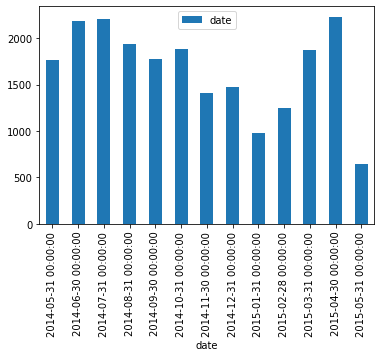

In [19]:
pd.DataFrame(df.resample("M", on="date")["date"].count()).plot(kind="bar")

In [20]:
df[df.groupby(["date"])["id"].transform("size") > 1]["date"].nunique()

358

In [21]:
min_date = min(df["date"])
max_date = max(df["date"])
print(f"Minimalny datum {min_date}, maximalny datum {max_date}")
print(max_date-min_date)

Minimalny datum 2014-05-02 00:00:00, maximalny datum 2015-05-27 00:00:00
390 days 00:00:00


V stĺpci `date` máme rozdiel 390 dní, pričom unikátnych dní bolo 358, z čoho nám vyplýva, že nie každý deň bol uskutočnený predaj nehnuteľnosti.

#### Stĺpec price

In [22]:
df["price"].value_counts()

450000.0     172
350000.0     172
550000.0     159
500000.0     152
425000.0     150
325000.0     148
400000.0     145
375000.0     138
300000.0     133
525000.0     131
250000.0     130
475000.0     120
330000.0     119
650000.0     117
275000.0     113
315000.0     111
415000.0     111
280000.0     110
600000.0     110
390000.0     110
440000.0     109
320000.0     108
435000.0     105
340000.0     103
310000.0     101
335000.0      98
420000.0      97
360000.0      96
260000.0      95
265000.0      95
575000.0      93
380000.0      93
625000.0      93
305000.0      92
430000.0      91
345000.0      91
530000.0      91
270000.0      90
700000.0      89
465000.0      89
245000.0      89
370000.0      88
490000.0      88
290000.0      88
750000.0      87
355000.0      87
385000.0      86
410000.0      86
255000.0      86
230000.0      85
225000.0      83
515000.0      83
485000.0      82
235000.0      81
480000.0      81
285000.0      80
240000.0      80
405000.0      79
365000.0      

In [149]:
print("Priemer: %.2f" %df["price"].mean())
print("Median: %.2f" %df["price"].median())
print("Modus: %.2f, %.2f" %(df["price"].mode()[0], df["price"].mode()[1]))
print("Smerodajna odchylka: %.2f" %df["price"].std())

Priemer: 540088.14
Median: 450000.00
Modus: 350000.00, 450000.00
Smerodajna odchylka: 367127.20


In [23]:
buckets = pd.cut(df["price"], bins=10, include_lowest=True)
df.groupby(buckets)["id"].count()

price
(67374.999, 837500.0]     19022
(837500.0, 1600000.0]      2165
(1600000.0, 2362500.0]      298
(2362500.0, 3125000.0]       90
(3125000.0, 3887500.0]       26
(3887500.0, 4650000.0]        4
(4650000.0, 5412500.0]        4
(5412500.0, 6175000.0]        1
(6175000.0, 6937500.0]        1
(6937500.0, 7700000.0]        2
Name: id, dtype: int64

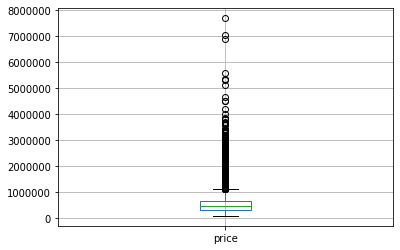

In [24]:
df.boxplot(column="price")

Z boxplotu je zrejmé, že náš dataset v stĺpci `price` obsahuje veľké množstvo outlierov.

Skewness (asymetria): 4.024
Kurtosis (špicatosť): 37.577


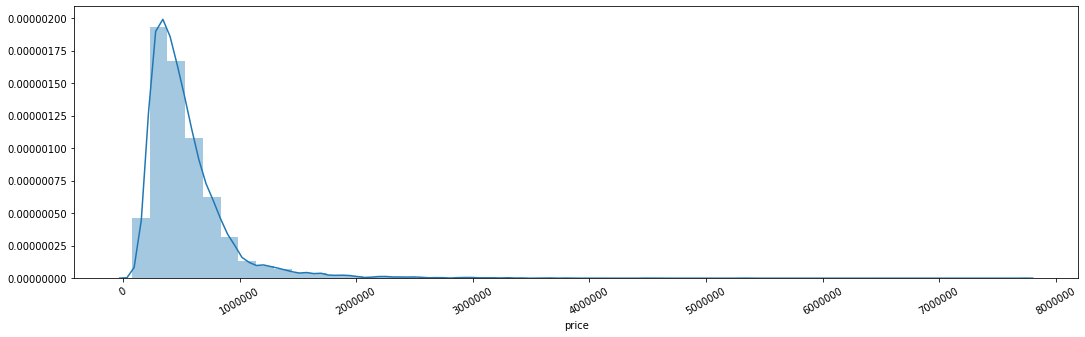

In [148]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 5)

plt.xticks(rotation=30)
print("Skewness (asymetria): %.3f" %stats.skew(df["price"]))
print("Kurtosis (špicatosť): %.3f" %stats.kurtosis(df["price"],fisher=False))
ax = sns.distplot(df["price"], bins=50)

Stĺpec `price` opisuje cenu, za ktorú bola nehnuteľnosť predaná. Z grafu je možné vidieť, že hodnoty cien sú veľmi naklonené doľava, čo dokazuje aj hodnota koeficientu asymetrie. Hodnota koeficientu špicatosti nám zas dodáva množstvo hodnôt sústredených na okrajoch rozdelenia, čo je v našom prípade veľmi vysoké (pre normálne rozdelenie ide o hodnotu 3)

In [138]:
#skewness + curtosis

#### Stĺpec bedrooms

Tento stĺpec označuje počet spální v nehnuteľnosti.

In [26]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Ako je možné vidieť, hodnoty stĺpca `bedrooms` sa pohybujú v rozmedzí 1 až 33, najpočetnejšie zastúpenie majú budovy s tromi spálňami.

#### Stĺpec bathrooms

In [27]:
df["bathrooms"].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [28]:
df['bathrooms'][df['bathrooms'] % 1 == 0].count()

6710

In [29]:
df['bathrooms'][df['bathrooms'] % 1 != 0].count()

14903

Stĺpec `bathrooms` obsahuje aj desatinné čísla, pretože za plnohodnotnú kúpelňu sa považuje iba taká, ktorá obsahuje umývadlo, sprchový kút, vaňu a záchod. Ak kúpelňa neobsahuje niektorú z týchto položiek, je hodnota v tomto stĺpci znížená o 0,25 pre každý chýbajúci prvok vodoinštalácie. 

#### Stĺpec sqft_living

In [30]:
df["sqft_living"].value_counts()

1300     138
1400     135
1440     133
1010     129
1660     129
1800     129
1820     128
1480     125
1720     125
1540     124
1560     124
1320     122
1250     120
1580     119
1370     118
1200     118
1900     117
1780     117
1650     117
2100     116
1460     116
1680     116
1430     116
1740     115
1830     114
1510     114
1340     113
1260     113
1500     112
1640     112
1240     112
1470     112
1610     112
2120     111
1790     110
1690     110
1960     110
1600     109
1670     109
1530     109
1410     109
1700     108
1980     105
1590     104
2020     104
2040     104
1760     104
2000     103
1270     102
1520     102
1940     101
2240     101
1840     101
1280     100
1140     100
2060     100
1730     100
1850     100
1570     100
1620      99
1490      99
2080      98
1890      98
1770      98
1150      98
1810      98
1550      96
1360      96
2160      96
1870      96
2090      95
1350      95
1060      94
2130      94
1920      94
1630      94
2200      93

In [31]:
df["sqft_living"].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

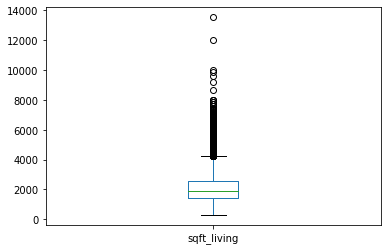

In [32]:
df["sqft_living"].plot(kind='box')

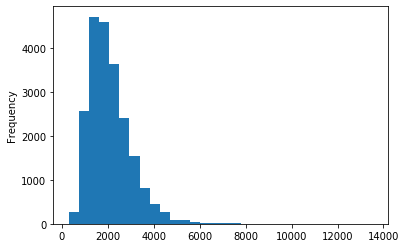

In [33]:
df["sqft_living"].plot(kind='hist', bins=30)

Stĺpec `sqft_living` udáva rozlohu obytnej časti nehnuteľnosti v štvorcových stopách, pričom 1 meter štvorcový = 10.7639104 sq ft

#### Stĺpec sqft_lot	

In [34]:
df["sqft_lot"].value_counts()

5000       358
6000       290
4000       251
7200       220
4800       120
7500       119
4500       114
8400       111
9600       109
3600       103
9000        93
3000        84
5100        78
7000        76
8000        76
5500        73
8100        72
7800        69
4080        67
7700        66
7350        64
5200        64
5750        61
4400        56
5400        54
6600        52
6250        50
4200        49
7560        48
10000       46
10800       44
9750        43
12000       42
8800        42
6500        40
6120        39
7210        38
2500        36
8250        34
4600        34
5250        32
6300        32
6380        31
3200        31
10500       31
7620        30
10200       30
5700        30
9900        29
5040        29
3800        28
15000       28
4750        27
5600        27
7680        27
5120        27
6750        26
7920        25
10125       25
3750        24
11250       24
3060        24
5650        23
6400        23
7650        23
3400        22
6200      

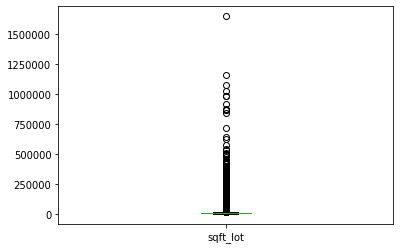

In [35]:
df["sqft_lot"].plot(kind='box')

Tento stĺpec má už na prvý pohľad veľmi vysoký rozptyl hodnôt.

In [36]:
df["sqft_lot"].describe()

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

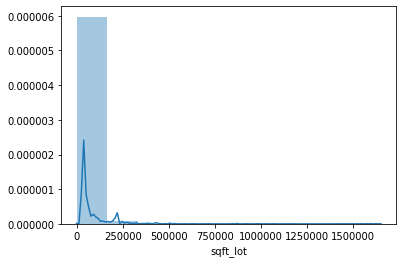

In [37]:
sns.distplot(df["sqft_lot"], bins = 10)

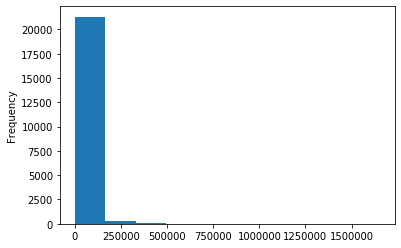

In [38]:
df["sqft_lot"].plot(kind='hist')

#### Stĺpec floors

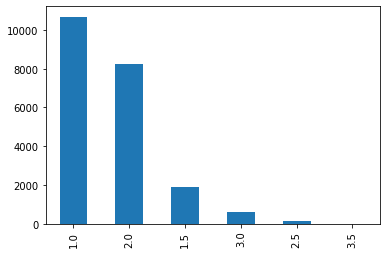

In [39]:
df["floors"].value_counts().plot(kind='bar')

Stĺpec `floors` vyjadruje počet poschodí. Nachádzajú sa tu však aj hodnoty s granularitou 0.5, čo znamená, že sa môže jednať o *Floor Area Ratio (FAR)*, ktoré je vyjadrené ako podiel celkovej plochy poschodia a veľkosti plochy pozemku, na ktorom je budova s poschodím postavená. (zdroj: https://en.wikipedia.org/wiki/Floor_area_ratio#/media/File:FAR_vs_BCR.svg)
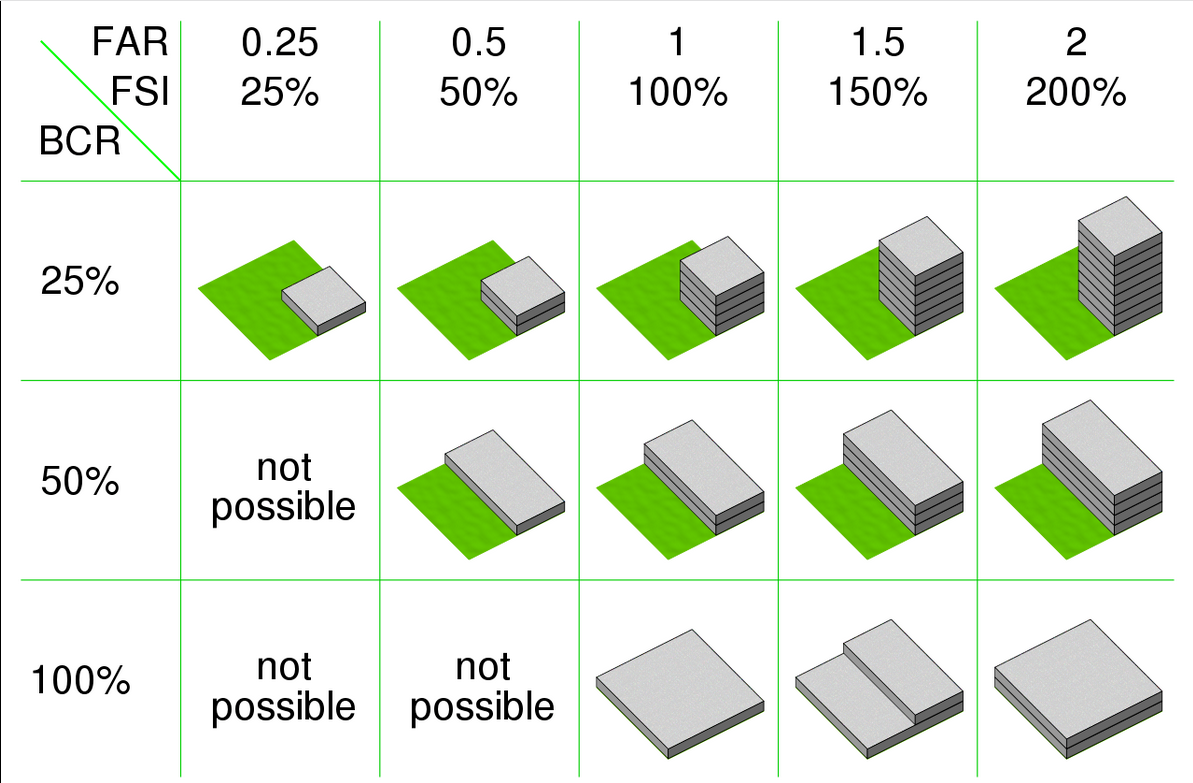

#### Stĺpec waterfront

In [40]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

Stĺpec `waterfront` je binárnou reprezentáciou toho, či z nehnuteľnosti je výhľad na pobrežie.

#### Stĺpec view

In [41]:
df["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [42]:
df['view'][df['view'] > 0].count()

2124

Stĺpec `view` vyjadruje kvalitu výhľadu z nehnuteľnosti, pričom 4 je najlepší výhľad a 0 naopak najhorší.

Len 2124 nehnuteľností má označenie adekvátneho výhľadu.

#### Stĺpec condition

In [43]:
df["condition"].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

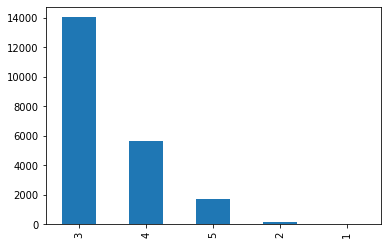

In [44]:
df["condition"].value_counts().plot(kind='bar')

Stĺpec `condition` vyjadruje stav, v akom sa nehnuteľnosť nachádza, 5 reprezentuje výborný stav, budovy označené číslom 1 nosia smutnú nálepku zlého technického stavu.

#### Stĺpec grade

In [45]:
df["grade"].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

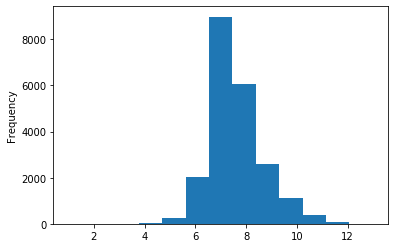

In [46]:
df["grade"].plot.hist(bins=13)

Stĺpec `grade` reprezentuje kvalitu budovy, pričom v sebe kombinuje hodnotenie konštrukčného návrhu a dizajnu nábytku a dekoru. Je vyjadrený hodnotami od 1 do 13.

#### Stĺpec sqft_above

In [47]:
df["sqft_above"].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
1400    180
1060    178
1180    177
1340    176
1250    174
1320    172
1100    164
1080    161
1040    160
1240    160
1150    159
1330    158
1440    155
1260    155
1120    154
1270    153
1370    153
1280    151
1090    148
1210    147
1390    147
1290    146
1540    145
960     144
1430    143
1160    143
1460    141
1000    138
1230    137
1170    137
1600    136
1410    136
1350    135
1360    134
1470    133
1480    130
1510    129
1420    127
1560    127
1050    126
1500    125
1520    125
1610    124
1130    124
1020    123
1450    119
1650    118
1070    116
1030    115
1680    115
980     114
1380    114
940     114
860     113
1190    111
1690    110
1550    110
1310    109
1720    109
1640    107
1660    106
1580    106
1590    105
1670    105
1490    105
880     104
1620    103
1570    102
1530    102
1800    100
1110     99
900      97
1770     97
1780     97
1700     97
910      97
1730     96
840      96
1630

In [48]:
df["sqft_above"].describe()

count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

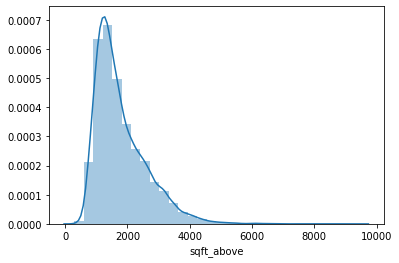

In [49]:
sns.distplot(df["sqft_above"], bins=30)

Stĺpec `sqft_above` vyjadruje obytnú plochu nehnuteľnosti, ktorá sa nachádza v nadzemnej časti budovy.

#### Stĺpec sqft_basement

In [50]:
df["sqft_basement"].value_counts()

0       13126
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
940        72
290        72
770        71
910        71
350        70
1200       70
880        69
440        69
520        69
1010       68
920        68
630        68
760        66
740        66
730        65
960        65
560        64
430        64
640        63
950        63
280        63
460        63
340        63
790        63
570        62
820        62
830        59
1060       59
310        58
980        57
540        57
1040       57
140        56
810        56
470        55
250        55
120        54
990        54
890        53
660        52
1020       52
1070  

In [51]:
df["sqft_basement"].describe()

count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [52]:
df['sqft_basement'][df['sqft_basement'] > 0].count()

8487

Iba 8487 nehnuteľností má suterén.

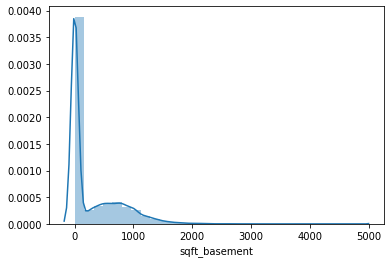

In [53]:
sns.distplot(df["sqft_basement"], bins=30)

Stĺpec `sqft_basement` vyjadruje rozlohu suterénu budovy. Pokiaľ budova suterénom nedisponuje, je táto hodnota nastavená na 0, čomu zodpovedá 13126 záznamov.

#### Stĺpec yr_built

In [54]:
df["yr_built"].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    320
1962    312
2001    305
1954    305
1987    294
1989    290
1969    280
1955    271
1988    270
1999    265
1947    263
1963    256
1976    253
1966    250
1950    250
1994    249
1960    248
1980    240
1998    239
1948    235
2009    230
1984    229
1951    229
1985    228
1961    224
1958    224
1991    224
1953    223
1942    223
2002    222
1952    220
2000    218
1986    215
1983    212
1993    202
2013    201
1981    199
1956    198
1957    198
1992    198
1996    195
1949    195
1975    189
1965    187
1926    180
1997    177
1964    172
2012    170
1943    170
1995    169
1925    165
1974    162
1941    161
1940    156
1972    149
1973    149
2010    143
1944    140
1924    139
1910    134
1970    132
2011    130
1928    126
1946    126
1918    120
1927    115
1929    114
1939    106
1982    105
1971    104
1920

In [55]:
df["yr_built"].min()

1900

In [56]:
df["yr_built"].max()

2015

In [57]:
df["yr_built"].mode()

0    2014
dtype: int64

In [58]:
df['yr_built'][df['yr_built'] > 2003].count()

3592

Stĺpec `yr_built` reprezentuje rok, v ktorom bola nehnuteľnosť postavená. Najčastejšou hodnotou (modus) je rok 2014, najviac sa teda predalo novostavieb. Budovy, ktorých vek je do 10 rokov tvoria 3592 predajov.  

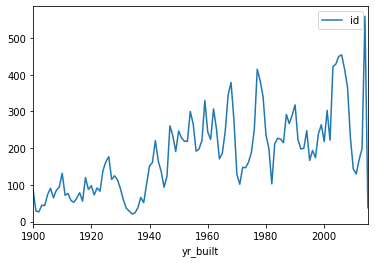

In [59]:
df_id_uniq = df.drop_duplicates(subset=["id"])
df_id_uniq.groupby(['yr_built']).agg({"id":"count"}).plot.line()

Graf nám zobrazuje početnosť nehnuteľností pre jednotlivé roky, v ktorých boli postavené

#### Stĺpec yr_renovated

In [60]:
df["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
1997       15
1988       15
2011       13
1980       11
2012       11
1982       11
1979       10
1970        9
1968        8
1977        8
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, 

In [61]:
df['yr_renovated'][df['yr_renovated'] > 0].count()

914

Iba 914 budov prešlo rekonštrukciou.

In [62]:
df['yr_renovated'][(0 < df['yr_renovated']) & (df['yr_renovated'] < df['yr_built'])].count()

0

Stĺpec `yr_renovated` vyjadruje rok, kedy došlo k rekonštrukcii nehnuteľnosti. Pokiaľ ide o budovu v pôvodnom stave, stĺpec obsahuje hodnotu 0. Dataset bol skontrolovaný pre chybne zadané hodnoty (`yr_renovated` menší ako `yr_built`).

#### Stĺpec zipcode

In [79]:
df["zipcode"].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
98065    310
98122    290
98146    288
98028    283
98008    283
98040    282
98198    280
98003    280
98031    274
98072    273
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, dtype: int64

Stĺpec `zipcode` zastupuje PSČ, v ktorom sa daná nehnuteľnosť nachádza. Celkovo v datasete identifikujeme 70 unikátnych PSČ.

#### Stĺpec lat

In [64]:
df["lat"].value_counts()

47.5491    17
47.6846    17
47.6624    17
47.5322    17
47.6711    16
47.6886    16
47.6955    16
47.6860    15
47.6647    15
47.6904    15
47.6842    15
47.5402    15
47.5400    14
47.6374    14
47.5396    14
47.6821    14
47.6651    14
47.6853    14
47.6727    14
47.6534    14
47.5323    14
47.5445    14
47.7076    14
47.5518    14
47.6844    14
47.5533    14
47.5427    14
47.5342    14
47.6914    14
47.6729    14
47.6857    13
47.6968    13
47.5659    13
47.6368    13
47.6754    13
47.5305    13
47.6285    13
47.6875    13
47.6971    13
47.6801    13
47.6765    13
47.6970    13
47.6684    13
47.7222    13
47.5503    13
47.6981    13
47.6388    13
47.6916    13
47.5150    12
47.7735    12
47.6988    12
47.6948    12
47.5489    12
47.6536    12
47.6849    12
47.5328    12
47.5515    12
47.5540    12
47.6380    12
47.5631    12
47.6893    12
47.5401    12
47.6232    12
47.6719    12
47.7027    12
47.6911    12
47.5168    12
47.7289    12
47.5434    12
47.5677    12
47.6915    12
47.582

In [65]:
df["lat"].min()

47.1559

In [66]:
df["lat"].max()

47.7776

Stĺpec `lat` vyjadruje zemepisnú šírku ako prvú časť súradnicového systému. Reprezentuje uhlovú vzdialenosť lokalizovaného bodu od rovníka. 

#### Stĺpec long

In [67]:
df["long"].value_counts()

-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
-122.363     99
-122.288     98
-122.357     96
-122.284     95
-122.365     94
-122.172     94
-122.306     93
-122.346     93
-122.375     92
-122.299     92
-122.351     92
-122.348     92
-122.304     92
-122.295     91
-122.285     90
-122.350     90
-122.292     90
-122.352     89
-122.289     89
-122.298     88
-122.359     88
-122.384     87
-122.301     86
-122.317     86
-122.316     86
-122.287     85
-122.354     85
-122.353     85
-122.391     85
-122.361     85
-122.311     84
-122.385     84
-122.371     83
-122.189     83
-122.286     83
-122.378     81
-122.349     81
-122.370     81
-122.388     81
-122.340     80
-122.387     79
-122.358     78
-122.307     78
-122.331     78
-122.308     78
-122.356     77
-122.337     77
-122.297     76
-122.360     76
-122.174     75
-122.369     75
-122.339     75
-122.319     75
-122.324     75
-122.302     75
-122.379     74
-122.315     74
-122.321

In [69]:
df["long"].max()

-121.315

Stĺpec `long` vyjadruje zemepisnú dĺžku ako druhú časť súradnicového systému. Reprezentuje uhlovú vzdialenosť medzi hlavným poludníkom a poludníkom prechádzajúcim lokalizovaným bodom.

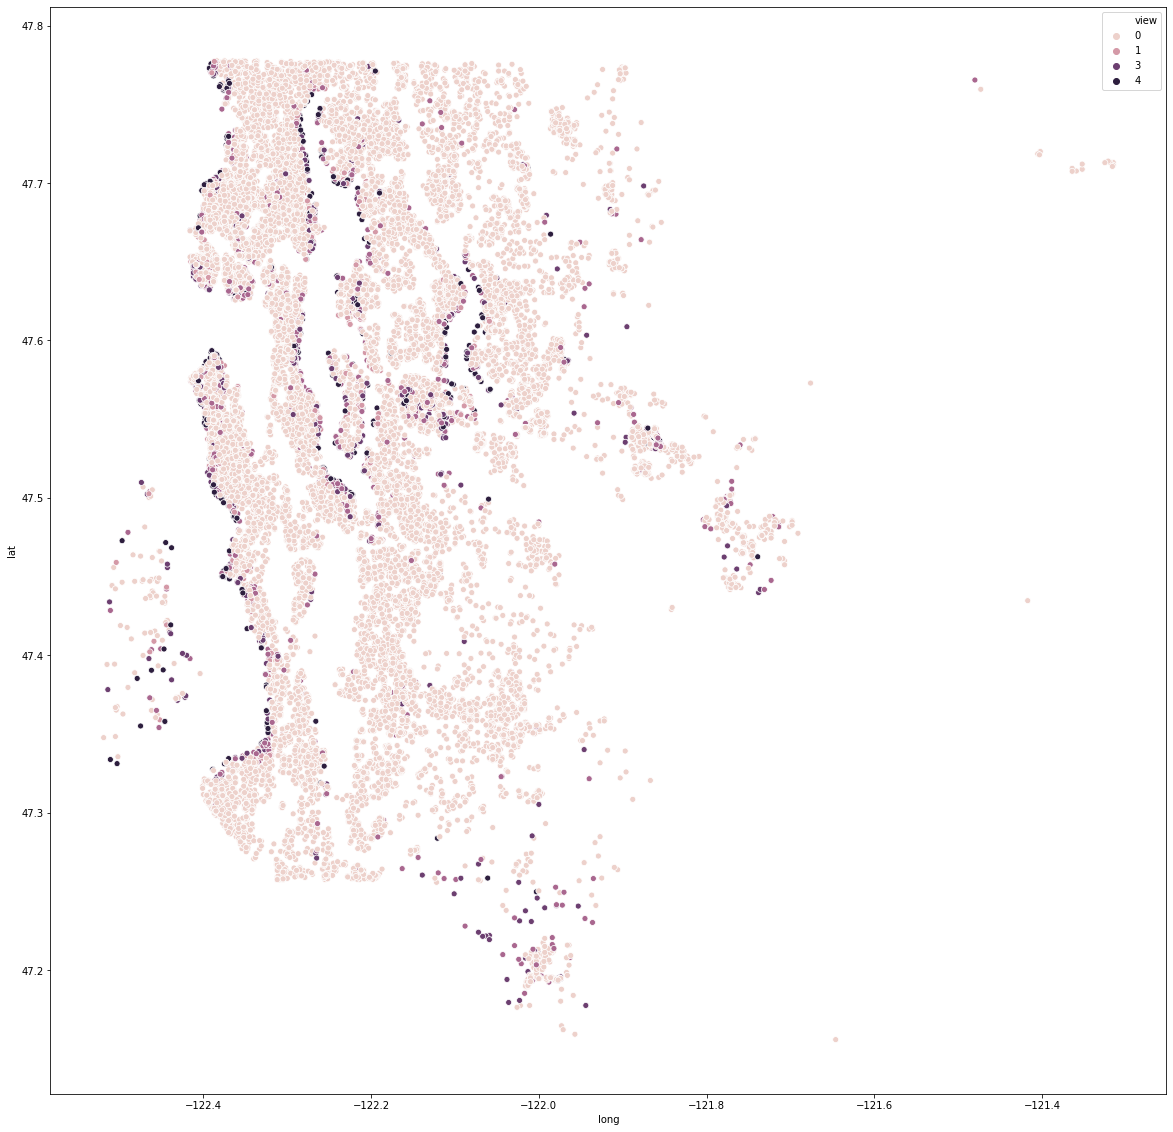

In [92]:
fig, ax = plt.subplots(figsize=(20,20))
sns.scatterplot(x='long', y='lat', hue="view", data=df, ax=ax)

Mapa vytvorená vizualizáciou všetkých bodov zo stĺpcov `lat` a `long`. Farebné odlíšenie nám ukazuje oblasti s najlepším výhľadom

#### Stĺpec sqft_living15

In [71]:
df["sqft_living15"].value_counts()

1540    197
1440    195
1560    192
1500    181
1460    169
1580    167
1610    166
1800    166
1720    166
1620    165
1510    164
1760    163
1480    160
1410    159
1550    158
1670    157
1680    157
1820    157
1520    155
1660    155
1300    154
1780    154
1470    154
1570    154
1640    152
1600    149
1690    149
1700    148
1530    148
1320    148
1420    148
1590    143
1650    143
1490    142
1360    142
1310    139
1770    138
1940    137
1380    136
1950    135
1370    135
1830    135
1630    134
1850    134
1900    132
1880    132
1740    131
1400    131
1350    130
1390    129
1250    129
1450    127
1710    126
2090    126
2040    126
1430    126
1860    126
1750    123
1330    122
2060    121
1340    121
1280    120
1920    119
1810    119
1890    117
1970    117
1870    117
1960    115
2030    115
1910    115
1790    115
1980    114
2020    114
1840    114
2080    112
1730    112
1930    110
2000    109
1220    107
1260    106
1270    106
1230    106
1200    106
2010

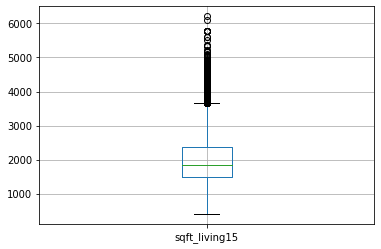

In [72]:
df.boxplot(column="sqft_living15")

Stĺpec je charakteristikou rozlohy obytného priestoru pre najbližších 15 susedných nehnuteľností, môžeme pozorovať veľký počet vychýlených hodnôt

#### Stĺpec sqft_lot15

In [73]:
df["sqft_lot15"].value_counts()

5000      427
4000      357
6000      289
7200      211
4800      145
7500      142
8400      116
3600      111
4500      111
5100      109
4080      106
8000      105
9600       99
8100       93
9000       92
7800       86
7700       85
5500       81
5400       71
6600       68
7350       67
5200       66
5750       64
4400       63
4200       61
10000      58
7560       57
5250       52
3000       52
9750       49
7620       47
7000       46
8800       46
10800      45
6250       44
7210       43
8250       42
10125      41
3800       41
6380       40
12000      39
7680       38
10500      37
5040       35
6300       34
11250      33
5700       33
7875       33
9800       32
7920       32
5800       31
3750       31
9450       31
6500       30
10200      30
9900       30
8500       29
7600       28
8750       28
7650       27
15000      27
6120       27
7440       26
9375       25
4750       25
4560       25
217800     25
9100       25
4590       24
3880       24
5120       23
8160  

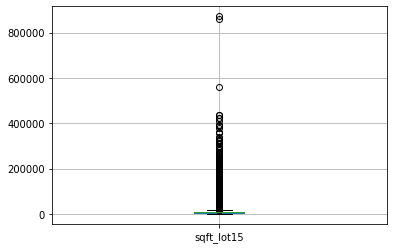

In [74]:
df.boxplot(column="sqft_lot15")

Podobne ako pri stĺpci `sqft_lot`, aj pri stĺpci popisujpcom rozlohu celého pozemku pre najbližších 15 susedných pozemkov pozorujeme pestrú škálu vychýlených hodnôt

### Párová analýza atribútov

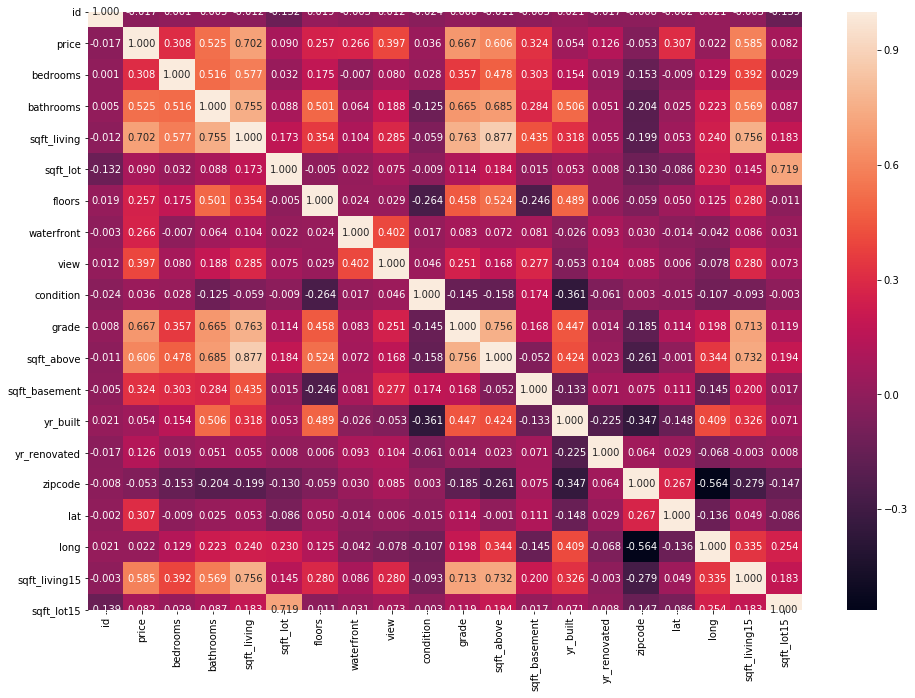

In [98]:
fig, ax = plt.subplots(figsize=(16,11))
sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".3f")

Z teplotnej mapy vidíme korelácie medzi jednotlivými numerickými atribútmi, pričom je možné pozorovať viacero zaujímavých korelácii, napr. medzi atribútmi `grade` a `sqft_above`, `sqft_above` a `sqft_living` alebo `price` a `sqft_living`

#### Analýza dvojíc numerických atribútov

##### price a sqft_living

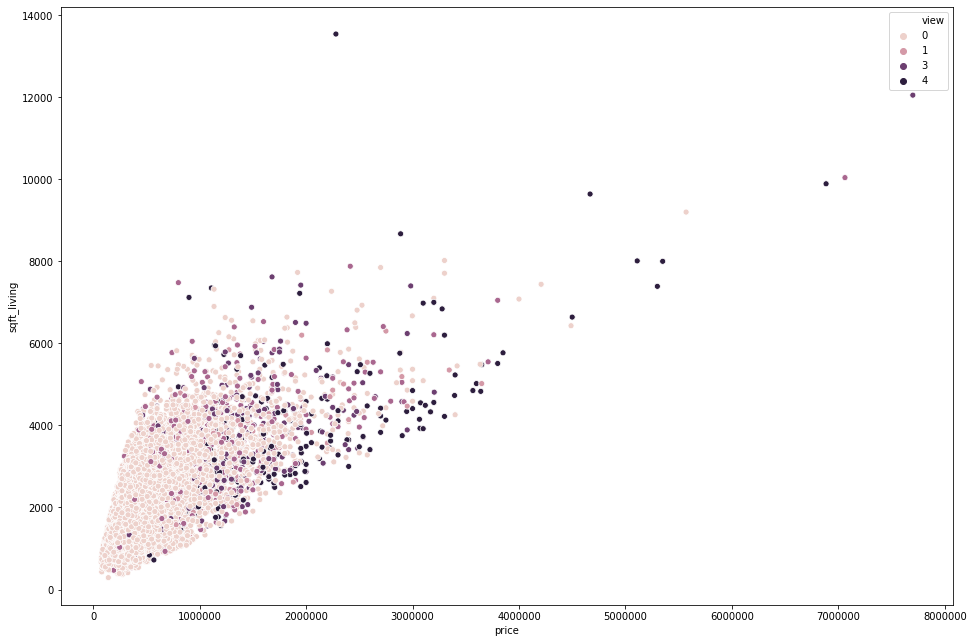

In [111]:
fig, ax = plt.subplots(figsize=(16,11))
sns.scatterplot(x="price", y="sqft_living", hue="view", data=df, ax=ax)

In [112]:
df["price"].corr(df["sqft_living"])

0.7020350546118004

`price` a `sqft_living` majú silnú koreláciu

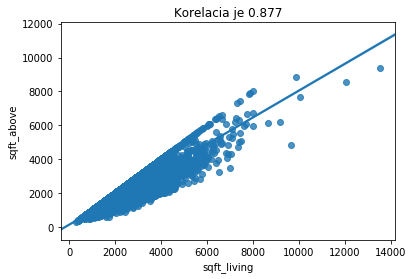

In [154]:
fig, ax = plt.subplots()
corr = "Korelacia je %.3f" %df["sqft_above"].corr(df["sqft_living"])
ax.set_title(str(corr))
sns.regplot(x="sqft_living", y="sqft_above", data=df, ax=ax)
print()

Najsilnejšia korelácia je medzi atribútmi `sqft_above` a `sqft_living`, čo je logické vzhľadom na fakt, že obývaná plocha je zároveň aj plochou v nadzemnej časti nehnuteľnosti

#### Analýza kombinácií spojitého a kategorického atribútu

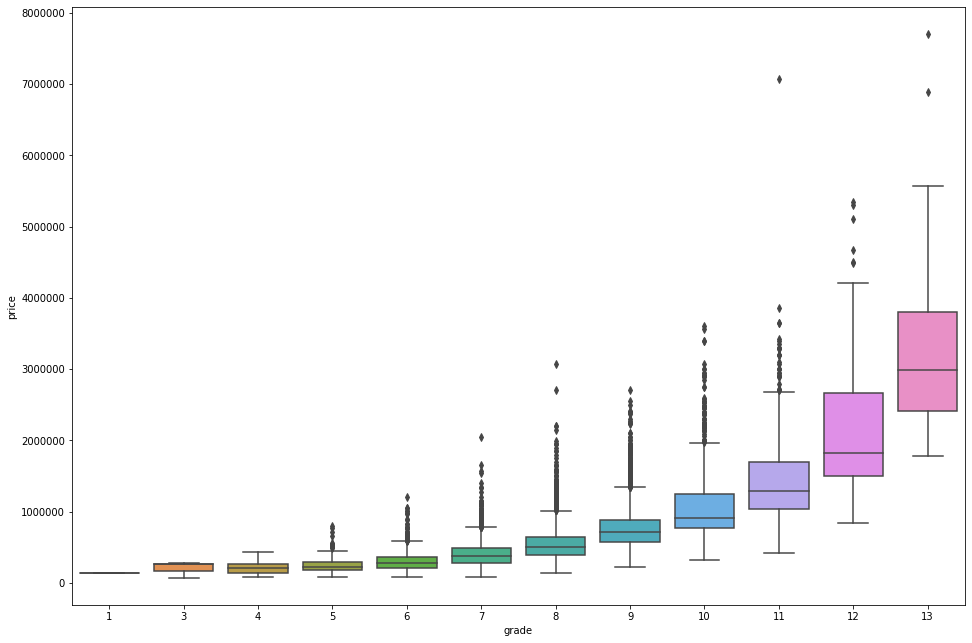

In [137]:
fig, ax = plt.subplots(figsize=(16,11))
sns.boxplot(x="grade", y="price", data=df, ax=ax)

In [131]:
df["price"].corr(df["grade"])

0.6674342560202366

#### Analýza dvojíc kategorických atribútov

## Definovanie úlohy objavovania znalostí

Regresia ako vínko.

## Predpokladaný scenár riešenia (problémy)